In [1]:
# Python
import itertools
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from autots import AutoTS
import matplotlib.pyplot as plt 
import funciones
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [24]:
df_main = pd.read_excel("https://raw.githubusercontent.com/carrenogf/MCD-Series-Temporales/main/dataset/series_diarias.xlsx")
df_main = df_main.sort_values("FECHA",ascending=True)
df_main.set_index("FECHA", inplace=True)
df_copa = df_main["CHU_COPA_AJUST"].dropna()
df_recprop = df_main["CHU_REC_PROPIOS_AJUST"].dropna()
df_regal = df_main["CHU_REGALIAS_AJUST"].dropna()
dataframes = [df_copa, df_recprop, df_regal]
for i in range(len(dataframes)):
  dataframes[i] = dataframes[i].reindex(pd.date_range(start=dataframes[i].index.min(), end=dataframes[i].index.max(), freq='B'))
  dataframes[i] = dataframes[i].fillna(0)
    
titulos = ["CHU_COPA_AJUST", "CHU_REC_PROPIOS_AJUST", "CHU_REGALIAS_AJUST"]

In [28]:
# TRAIN TEST
n_train = 0.9
train_copa = dataframes[0].iloc[:round(len(dataframes[0])*n_train)]
test_copa = dataframes[0].iloc[round(len(dataframes[0])*n_train):]
print(f"Coparticipacion: train({train_copa.shape}), test({test_copa.shape})")

train_recursos = dataframes[1].iloc[:round(len(dataframes[1])*n_train)]
test_recursos = dataframes[1].iloc[round(len(dataframes[1])*n_train):]
print(f"Recursos: train({train_recursos.shape}), test({test_recursos.shape})")

train_regalias = dataframes[2].iloc[:round(len(dataframes[2])*n_train)]
test_regalias = dataframes[2].iloc[round(len(dataframes[2])*n_train):]
print(f"Regalias: train({train_regalias.shape}), test({test_regalias.shape})")

dataframes_train = [ train_copa, train_recursos, train_regalias ]
dataframes_test = [ test_copa, test_recursos, test_regalias ]

Coparticipacion: train((1584,)), test((176,))
Recursos: train((1995,)), test((222,))
Regalias: train((1985,)), test((221,))


In [30]:
results_train_test = []
predictions_test = []
for i, df in enumerate(dataframes_train):
    df_train = df
    df_test = dataframes_test[i]
    
    model = AutoTS(
        forecast_length=len(dataframes_test[i]),
        frequency="B",
        prediction_interval=0.95,
        ensemble=None,
        models_mode='deep',
        model_list = 'superfast',
        max_generations=10,   # intenta optimizar el modelo a traves de 10 iteraciones de ajuste.
        num_validations=3,
        no_negatives=True,
        n_jobs='auto')
    modelAutoTS = model.fit(df_train)
    # Find the best parameters
    
    fechas = pd.date_range(start=df_test.index.min(), end=df_test.index.max(), freq='B')
    pred_test = model.predict(forecast_length=len(fechas)).forecast
    predictions_test.append(pred_test)
    # Cálculo del MSE en el conjunto de prueba
    mape_test = mean_absolute_percentage_error(df_test, pred_test)
    mape_mean = mean_absolute_percentage_error(df_test, [df_test.mean()] * len(df_test))
    mse_test = mean_absolute_percentage_error(df_test, pred_test)
    mae_test = mean_absolute_error(df_test, pred_test)
    rmse = np.sqrt(mean_squared_error(df_test, pred_test))
    results_train_test.append({
        "model": modelAutoTS,
        "name": df_train.name,
        "len_train": len(df_train),
        "len_test": len(df_test),
        "mape_test": mape_test,
        "mse_test":mse_test,
        "mape_mean": mape_mean,
        "mae_test": mae_test,
        "rmse": rmse
    })



Using 3 cpus for n_jobs.
Data frequency is: B, used frequency is: B
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model GLS in generation 0 of 10
Model Number: 5 with model GLS in generation 0 of 10
Model Number: 6 with model LastValueNaive in generation 0 of 10
Model Number: 7 with model LastValueNaive in generation 0 of 10
Model Number: 8 with model LastValueNaive in generation 0 of 10
Model Number: 9 with model LastValueNaive in generation 0 of 10
Model Number: 10 with model SeasonalNaive in generation 0 of 10
Model Number: 11 with model SeasonalNaive in generation 0 of 10
Model Number: 12 with model SeasonalNaive in generation 0 of 10
Model Number: 13 with model ConstantNaive in generation 0 of 10
Model Number: 14 with model SeasonalNaive in generation 0 of 10
Model Number: 15 with model SectionalMotif in gen

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 24 with model SeasonalNaive in generation 0 of 10
Model Number: 25 with model SeasonalityMotif in generation 0 of 10
Model Number: 26 with model SectionalMotif in generation 0 of 10
Model Number: 27 with model LastValueNaive in generation 0 of 10
Model Number: 28 with model SectionalMotif in generation 0 of 10
Model Number: 29 with model SectionalMotif in generation 0 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Template Eval Error: Exception("Transformer SinTrend failed on fit from params fake_date {'0': {}, '1': {}, '2': {}, '3': {'lag_1': 12, 'method': 'LastValue'}, '4': {'sigma': 0.5, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': 3, 'min_samples_split': 2}}, 'datepart_method': 'simple', 'polynomial_degree': 2, 'transform_dict': None, 'holiday_countries_used': False, 'lags': None, 'forward_lags': None}, 'holiday_params': None, 'trend_method': 'rolling_mean'}}") in model 29 in generation 0: SectionalMotif
Model Number: 30 with model ConstantNaive in generation 0 of 10
Model Number: 31 with model SeasonalityMotif in generation 0 of 10
Model Number: 32 with model SectionalMotif in generation 0 of 10
Model Number: 33 with model SeasonalityMotif in generation 0 of 10
Model Number: 34 with model SeasonalityMotif in generation 0 of 10
Model Number: 35 with model LastValueNaive in generation 0 of 

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Model Number: 46 with model ConstantNaive in generation 0 of 10
Model Number: 47 with model AverageValueNaive in generation 0 of 10
Model Number: 48 with model SeasonalityMotif in generation 0 of 10
Model Number: 49 with model GLS in generation 0 of 10
Model Number: 50 with model AverageValueNaive in generation 0 of 10
Model Number: 51 with model SectionalMotif in generation 0 of 10
Model Number: 52 with model SectionalMotif in generation 0 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 52 in generation 0: SectionalMotif
Model Number: 53 with model ConstantNaive in generation 0 of 10
Model Number: 54 with model SeasonalityMotif in generation 0 of 10
New Generation: 1 of 10
Model Number: 55 with model SeasonalNaive in generation 1 of 10
Model Number: 56 with model SeasonalNaive in generation 1 of 10
Model Number: 57 with model SectionalMotif in generation 1 of 10
Model Number: 58 with model SectionalMotif in generation 1 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 77 with model GLS in generation 1 of 10
Model Number: 78 with model AverageValueNaive in generation 1 of 10
Model Number: 79 with model SeasonalNaive in generation 1 of 10
Model Number: 80 with model SeasonalNaive in generation 1 of 10
Model Number: 81 with model AverageValueNaive in generation 1 of 10
Model Number: 82 with model AverageValueNaive in generation 1 of 10
Model Number: 83 with model LastValueNaive in generation 1 of 10
Model Number: 84 with model AverageValueNaive in generation 1 of 10
Model Number: 85 with model SectionalMotif in generation 1 of 10
Model Number: 86 with model SeasonalityMotif in generation 1 of 10
Model Number: 87 with model SeasonalityMotif in generation 1 of 10
Model Number: 88 with model GLS in generation 1 of 10
Model Number: 89 with model AverageValueNaive in generation 1 of 10
New Generation: 2 of 10
Model Number: 90 with model SeasonalNaive in generation 2 of 10
Model Number: 91 with model SectionalMotif in generation 2 of 10
Model N

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 105 with model SeasonalNaive in generation 2 of 10
Model Number: 106 with model AverageValueNaive in generation 2 of 10
Model Number: 107 with model SeasonalNaive in generation 2 of 10
Model Number: 108 with model SeasonalityMotif in generation 2 of 10
Model Number: 109 with model SeasonalityMotif in generation 2 of 10
Model Number: 110 with model SeasonalNaive in generation 2 of 10
Model Number: 111 with model SeasonalityMotif in generation 2 of 10
Model Number: 112 with model SeasonalNaive in generation 2 of 10
Model Number: 113 with model AverageValueNaive in generation 2 of 10
Model Number: 114 with model SeasonalityMotif in generation 2 of 10
Model Number: 115 with model ConstantNaive in generation 2 of 10
Model Number: 116 with model GLS in generation 2 of 10
Model Number: 117 with model SectionalMotif in generation 2 of 10
Model Number: 118 with model SectionalMotif in generation 2 of 10
Model Number: 119 with model SeasonalNaive in generation 2 of 10
Model Number:

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:1512: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_with_last = pd.concat([self.last_values, df])
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:1512: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_with_last = pd.concat([self.last_values, df])


Model Number: 165 with model SeasonalNaive in generation 4 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params mean {'0': {'det_order': -1, 'k_ar_diff': 0}, '1': {'window_size': 90, 'alpha': 2.5, 'grouping_forward_limit': 2, 'max_level_shifts': 10, 'alignment': 'average'}, '2': {}}") in model 165 in generation 4: SeasonalNaive
Model Number: 166 with model SeasonalNaive in generation 4 of 10
Model Number: 167 with model SectionalMotif in generation 4 of 10
Model Number: 168 with model SectionalMotif in generation 4 of 10
Model Number: 169 with model LastValueNaive in generation 4 of 10
Model Number: 170 with model SeasonalityMotif in generation 4 of 10
Model Number: 171 with model SeasonalityMotif in generation 4 of 10
Model Number: 172 with model SectionalMotif in generation 4 of 10
Model Number: 173 with model AverageValueNaive in generation 4 of 10
Model Number: 174 with model AverageValueNaive in generation 4 of 10
Model Number: 175 with model C

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight


Model Number: 182 with model AverageValueNaive in generation 4 of 10
Model Number: 183 with model SectionalMotif in generation 4 of 10
Model Number: 184 with model GLS in generation 4 of 10
Model Number: 185 with model SeasonalityMotif in generation 4 of 10
Model Number: 186 with model SectionalMotif in generation 4 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params akima {'0': {}, '1': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10, 'threshold_method': 'mean'}, '2': {'lag_1': 12, 'method': 'Mean'}, '3': {'det_order': 0, 'k_ar_diff': 0}}") in model 186 in generation 4: SectionalMotif
Model Number: 187 with model SeasonalityMotif in generation 4 of 10
Model Number: 188 with model SectionalMotif in generation 4 of 10
Model Number: 189 with model SeasonalityMotif in generation 4 of 10
Model Number: 190 with model LastValueNaive in generation 4 of 10
Model Number: 191 with model SeasonalityMotif 

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1143: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp.replace(replace_dict).astype(float).fillna(0),
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1143: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp.replace(replace_dict).astype(float).fillna(0),
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1143: FutureWarning

Model Number: 215 with model AverageValueNaive in generation 5 of 10
Model Number: 216 with model SeasonalNaive in generation 5 of 10
Model Number: 217 with model SeasonalNaive in generation 5 of 10
Model Number: 218 with model GLS in generation 5 of 10
Model Number: 219 with model SectionalMotif in generation 5 of 10
Model Number: 220 with model SeasonalityMotif in generation 5 of 10
Model Number: 221 with model AverageValueNaive in generation 5 of 10
Model Number: 222 with model SectionalMotif in generation 5 of 10
New Generation: 6 of 10
Model Number: 223 with model SectionalMotif in generation 6 of 10
Model Number: 224 with model SectionalMotif in generation 6 of 10
Model Number: 225 with model GLS in generation 6 of 10
Model Number: 226 with model SeasonalityMotif in generation 6 of 10
Model Number: 227 with model SeasonalNaive in generation 6 of 10
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params ffill {'0': {'method': 'remove', 'std_thresh

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1137: RuntimeWarning: overflow encountered in cast
  result.smoothed.states.cov[:, j, :, :] = Ps
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1143: RuntimeWarning: overflow encountered in cast
  result.smoothed.observations.cov[:, j, :, :] = obs_cov
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1354: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1341: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)


SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params rolling_mean {'0': {}, '1': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'mean'}, '2': {}, '3': {'model_name': 'local linear hidden state with seasonal 12', 'state_transition': [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight


52 - GLS with avg smape 83.89: 
Model Number: 53 of 54 with model GLS for Validation 1
53 - GLS with avg smape 86.06: 
Model Number: 54 of 54 with model GLS for Validation 1
54 - GLS with avg smape 84.41: 
Validation Round: 2
Model Number: 1 of 54 with model SeasonalityMotif for Validation 2
1 - SeasonalityMotif with avg smape nan: 
Model Number: 2 of 54 with model SeasonalityMotif for Validation 2
2 - SeasonalityMotif with avg smape nan: 
Model Number: 3 of 54 with model SeasonalityMotif for Validation 2
3 - SeasonalityMotif with avg smape nan: 
Model Number: 4 of 54 with model SeasonalityMotif for Validation 2
4 - SeasonalityMotif with avg smape nan: 
Model Number: 5 of 54 with model SeasonalityMotif for Validation 2
5 - SeasonalityMotif with avg smape nan: 
Model Number: 6 of 54 with model SeasonalityMotif for Validation 2
6 - SeasonalityMotif with avg smape nan: 
Model Number: 7 of 54 with model SeasonalityMotif for Validation 2
7 - SeasonalityMotif with avg smape nan: 
Model Numbe

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight


52 - GLS with avg smape 75.11: 
Model Number: 53 of 54 with model GLS for Validation 2
53 - GLS with avg smape 75.45: 
Model Number: 54 of 54 with model GLS for Validation 2
54 - GLS with avg smape 75.73: 
Validation Round: 3
Model Number: 1 of 54 with model SeasonalityMotif for Validation 3
1 - SeasonalityMotif with avg smape nan: 
Model Number: 2 of 54 with model SeasonalityMotif for Validation 3
2 - SeasonalityMotif with avg smape nan: 
Model Number: 3 of 54 with model SeasonalityMotif for Validation 3
3 - SeasonalityMotif with avg smape nan: 
Model Number: 4 of 54 with model SeasonalityMotif for Validation 3
4 - SeasonalityMotif with avg smape nan: 
Model Number: 5 of 54 with model SeasonalityMotif for Validation 3
5 - SeasonalityMotif with avg smape nan: 
Model Number: 6 of 54 with model SeasonalityMotif for Validation 3
6 - SeasonalityMotif with avg smape nan: 
Model Number: 7 of 54 with model SeasonalityMotif for Validation 3
7 - SeasonalityMotif with avg smape nan: 
Model Numbe

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\evaluator\auto_model.py:2462: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\evaluator\auto_model.py:2462: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model GLS in generation 0 of 10
Model Number: 5 with model GLS in generation 0 of 10
Model Number: 6 with model LastValueNaive in generation 0 of 10
Model Number: 7 with model LastValueNaive in generation 0 of 10
Model Number: 8 with model LastValueNaive in generation 0 of 10
Model Number: 9 with model LastValueNaive in generation 0 of 10
Model Number: 10 with model SeasonalNaive in generation 0 of 10
Model Number: 11 with model SeasonalNaive in generation 0 of 10
Model Number: 12 with model SeasonalNaive in generation 0 of 10
Model Number: 13 with model ConstantNaive in generation 0 of 10
Model Number: 14 with model SeasonalNaive in generation 0 of 10
Model Number: 15 with model SectionalMotif in generation 0 of 10
Model Number: 16 with model SectionalMotif in generation 0 of 10
Model Number: 17 with model SeasonalNaive in generatio

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 24 with model SeasonalNaive in generation 0 of 10
Model Number: 25 with model SeasonalityMotif in generation 0 of 10
Model Number: 26 with model SectionalMotif in generation 0 of 10
Model Number: 27 with model LastValueNaive in generation 0 of 10
Model Number: 28 with model SectionalMotif in generation 0 of 10
Model Number: 29 with model SectionalMotif in generation 0 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Template Eval Error: Exception("Transformer SinTrend failed on fit from params fake_date {'0': {}, '1': {}, '2': {}, '3': {'lag_1': 12, 'method': 'LastValue'}, '4': {'sigma': 0.5, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 1.0}}, 'datepart_method': 'simple', 'polynomial_degree': 2, 'transform_dict': None, 'holiday_countries_used': False, 'lags': None, 'forward_lags': None}, 'holiday_params': None, 'trend_method': 'rolling_mean'}}") in model 29 in generation 0: SectionalMotif
Model Number: 30 with model ConstantNaive in generation 0 of 10
Model Number: 31 with model SeasonalityMotif in generation 0 of 10
Model Number: 32 with model SectionalMotif in generation 0 of 10
Model Number: 33 with model SeasonalityMotif in generation 0 of 10
Model Number: 34 with model SeasonalityMotif in generation 0 of 10
Model Number: 35 with model LastValueNaive in generation 

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Model Number: 46 with model ConstantNaive in generation 0 of 10
Model Number: 47 with model AverageValueNaive in generation 0 of 10
Model Number: 48 with model SeasonalityMotif in generation 0 of 10
Model Number: 49 with model GLS in generation 0 of 10
Model Number: 50 with model AverageValueNaive in generation 0 of 10
Model Number: 51 with model SectionalMotif in generation 0 of 10
Model Number: 52 with model SectionalMotif in generation 0 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 52 in generation 0: SectionalMotif
Model Number: 53 with model ConstantNaive in generation 0 of 10
Model Number: 54 with model SeasonalityMotif in generation 0 of 10
New Generation: 1 of 10
Model Number: 55 with model SectionalMotif in generation 1 of 10
Model Number: 56 with model ConstantNaive in generation 1 of 10
Model Number: 57 with model GLS in generation 1 of 10
Model Number: 58 with model AverageValueNaive in generation 1 of 10
Model N

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_fastica.py:589: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")


Model Number: 67 with model GLS in generation 1 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params fake_date {'0': {'output_distribution': 'uniform', 'n_quantiles': 1000}, '1': {'part': 'trend', 'lamb': 129600}, '2': {}, '3': {}, '4': {'det_order': 1, 'k_ar_diff': 1}}") in model 67 in generation 1: GLS
Model Number: 68 with model SeasonalNaive in generation 1 of 10
Model Number: 69 with model SectionalMotif in generation 1 of 10
Model Number: 70 with model SectionalMotif in generation 1 of 10
Model Number: 71 with model SeasonalNaive in generation 1 of 10
Model Number: 72 with model LastValueNaive in generation 1 of 10
Model Number: 73 with model SeasonalNaive in generation 1 of 10
Model Number: 74 with model SectionalMotif in generation 1 of 10
Model Number: 75 with model SeasonalityMotif in generation 1 of 10
Model Number: 76 with model SectionalMotif in generation 1 of 10
Model Number: 77 with model SectionalMotif in generation 1 of 10
Model Nu

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


New Generation: 2 of 10
Model Number: 90 with model SeasonalNaive in generation 2 of 10
Model Number: 91 with model SeasonalityMotif in generation 2 of 10
Model Number: 92 with model SeasonalityMotif in generation 2 of 10
Model Number: 93 with model AverageValueNaive in generation 2 of 10
Model Number: 94 with model LastValueNaive in generation 2 of 10
Model Number: 95 with model SeasonalNaive in generation 2 of 10
Model Number: 96 with model SectionalMotif in generation 2 of 10
Model Number: 97 with model LastValueNaive in generation 2 of 10
Model Number: 98 with model SeasonalNaive in generation 2 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 99 with model SectionalMotif in generation 2 of 10
Model Number: 100 with model SectionalMotif in generation 2 of 10
Model Number: 101 with model SeasonalNaive in generation 2 of 10
Model Number: 102 with model SectionalMotif in generation 2 of 10
Model Number: 103 with model SeasonalNaive in generation 2 of 10
Model Number: 104 with model SeasonalNaive in generation 2 of 10
Model Number: 105 with model LastValueNaive in generation 2 of 10
Model Number: 106 with model SectionalMotif in generation 2 of 10
Model Number: 107 with model ConstantNaive in generation 2 of 10
Model Number: 108 with model GLS in generation 2 of 10
Model Number: 109 with model SeasonalityMotif in generation 2 of 10
Model Number: 110 with model GLS in generation 2 of 10
Model Number: 111 with model LastValueNaive in generation 2 of 10
Model Number: 112 with model AverageValueNaive in generation 2 of 10
Model Number: 113 with model LastValueNaive in generation 2 of 10
Model Number: 114 with model Ave

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Model Number: 149 with model ConstantNaive in generation 3 of 10
Model Number: 150 with model SectionalMotif in generation 3 of 10
Model Number: 151 with model AverageValueNaive in generation 3 of 10
Model Number: 152 with model ConstantNaive in generation 3 of 10
Model Number: 153 with model SeasonalityMotif in generation 3 of 10
Model Number: 154 with model LastValueNaive in generation 3 of 10
Model Number: 155 with model SeasonalityMotif in generation 3 of 10
Model Number: 156 with model SeasonalNaive in generation 3 of 10
Model Number: 157 with model SectionalMotif in generation 3 of 10
Model Number: 158 with model SectionalMotif in generation 3 of 10
Model Number: 159 with model SectionalMotif in generation 3 of 10
New Generation: 4 of 10
Model Number: 160 with model SectionalMotif in generation 4 of 10
Model Number: 161 with model SectionalMotif in generation 4 of 10
Template Eval Error: ValueError('zero-size array to reduction operation fmax which has no identity') in model 161 

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 171 with model GLS in generation 4 of 10
Model Number: 172 with model AverageValueNaive in generation 4 of 10
Model Number: 173 with model LastValueNaive in generation 4 of 10
Model Number: 174 with model SectionalMotif in generation 4 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 175 with model GLS in generation 4 of 10
Model Number: 176 with model GLS in generation 4 of 10
Model Number: 177 with model SeasonalityMotif in generation 4 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.19129e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 178 with model SectionalMotif in generation 4 of 10
Model Number: 179 with model AverageValueNaive in generation 4 of 10
Model Number: 180 with model SeasonalNaive in generation 4 of 10
Model Number: 181 with model SectionalMotif in generation 4 of 10
Model Number: 182 with model SectionalMotif in generation 4 of 10
Model Number: 183 with model AverageValueNaive in generation 4 of 10
Model Number: 184 with model GLS in generation 4 of 10
Model Number: 185 with model SeasonalNaive in generation 4 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1091: RuntimeWarning: overflow encountered in cast
  filtered_states.cov[:, j, :, :] = P


SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params linear {'0': {'span': 10}, '1': {'lag': 7, 'fill': 'bfill'}, '2': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '3': {'model_name': 'factor', 'state_transition': [[1, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1]], 'process_noise': [[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0]], 'observation_model': [[1, 0, 0, 0, 0, 0]], 'observation_noise': 0.04, 'em_iter': 30, 'on_transform': True, 'on_inverse': False}, '4': {'output_distribution': 'normal', 'n_quantiles': 1000}}") in model 185 in generation 4: SeasonalNaive
Model Number: 186 with model LastValueNaive in generation 4 of 10
Model Number: 187 with model AverageValueNaive in generation 4 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1354: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\fast_kalman.py:1341: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)


Model Number: 188 with model GLS in generation 4 of 10
Model Number: 189 with model AverageValueNaive in generation 4 of 10
Model Number: 190 with model SectionalMotif in generation 4 of 10
Model Number: 191 with model SeasonalityMotif in generation 4 of 10
Model Number: 192 with model LastValueNaive in generation 4 of 10
Model Number: 193 with model SeasonalNaive in generation 4 of 10
Model Number: 194 with model GLS in generation 4 of 10
New Generation: 5 of 10
Model Number: 195 with model GLS in generation 5 of 10
Model Number: 196 with model LastValueNaive in generation 5 of 10
Model Number: 197 with model SeasonalNaive in generation 5 of 10
Model Number: 198 with model SeasonalNaive in generation 5 of 10
Model Number: 199 with model SeasonalityMotif in generation 5 of 10
Model Number: 200 with model SeasonalNaive in generation 5 of 10
Model Number: 201 with model SeasonalNaive in generation 5 of 10
Model Number: 202 with model SeasonalityMotif in generation 5 of 10
Model Number: 2

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 230 with model SeasonalityMotif in generation 6 of 10
Model Number: 231 with model SectionalMotif in generation 6 of 10
Model Number: 232 with model GLS in generation 6 of 10
Model Number: 233 with model SeasonalityMotif in generation 6 of 10
Model Number: 234 with model LastValueNaive in generation 6 of 10
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params fake_date {'0': {'method': 'IsolationForest', 'method_params': {'contamination': 0.05, 'n_estimators': 50, 'max_features': 1.0, 'bootstrap': False}, 'fillna': 'ffill', 'transform_dict': None, 'isolated_only': False}, '1': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 3, 'eta': 0.03, 'min_child_weight': 1, 'subsample': 1, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg_lambda': 1, 'n_estimators': 100}, 'datepart_method': 'expanded'}, 'fillna': 'ffill'}, '2': {'lag_1': 24, 'method': 'LastValue'}}") in model 234 in generation

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 248 with model GLS in generation 6 of 10
Model Number: 249 with model SectionalMotif in generation 6 of 10
Model Number: 250 with model SeasonalNaive in generation 6 of 10
New Generation: 7 of 10
Model Number: 251 with model SeasonalNaive in generation 7 of 10
Model Number: 252 with model SeasonalityMotif in generation 7 of 10
Model Number: 253 with model LastValueNaive in generation 7 of 10
Model Number: 254 with model SeasonalNaive in generation 7 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 255 with model GLS in generation 7 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'lag_1': 24, 'method': 'LastValue'}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '2': {}, '3': {'lag': 1, 'fill': 'bfill'}}") in model 255 in generation 7: GLS
Model Number: 256 with model SectionalMotif in generation 7 of 10
Model Number: 257 with model SeasonalNaive in generation 7 of 10
Model Number: 258 with model SeasonalityMotif in generation 7 of 10
Model Number: 259 with model SeasonalityMotif in generation 7 of 10
Model Number: 260 with model AverageValueNaive in generation 7 of 10
Model Number: 261 with model SeasonalityMotif in generation 7 of 10
Model Number: 262 with model SeasonalityMotif in generation 7 of 10
Model Number: 263 with model SectionalMotif in generation 7 of 10
Model Number: 264 with model SectionalMotif in generation 7 of 10
Model Number: 265 with model SeasonalityMotif in ge

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting 

Model Number: 271 with model SectionalMotif in generation 7 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '1': {}, '2': {'rows': 3}, '3': {'lag': 1, 'fill': 'bfill'}, '4': {'span': 2}}") in model 271 in generation 7: SectionalMotif
Model Number: 272 with model SectionalMotif in generation 7 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1132: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp.replace(replace_dict).astype(float).fillna(0),
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1132: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp.replace(replace_dict).astype(float).fillna(0),


Model Number: 273 with model AverageValueNaive in generation 7 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean_24 {'0': {}, '1': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '2': {'lag': 1, 'fill': 'bfill'}, '3': {'det_order': 1, 'k_ar_diff': 2}, '4': {'rows': 1, 'lag': 28, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}}") in model 273 in generation 7: AverageValueNaive
Model Number: 274 with model SectionalMotif in generation 7 of 10
Model Number: 275 with model SeasonalityMotif in generation 7 of 10
Model Number: 276 with model AverageValueNaive in generation 7 of 10
Model Number: 277 with model SectionalMotif in generation 7 of 10
Model Number: 278 with model SeasonalNaive in generation 7 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params neares

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.111e+15, tolerance: 2.871e+11
  model = cd_fast.enet_coordinate_descent(


Model Number: 283 with model GLS in generation 8 of 10
Model Number: 284 with model SectionalMotif in generation 8 of 10
Model Number: 285 with model SeasonalNaive in generation 8 of 10
Model Number: 286 with model SectionalMotif in generation 8 of 10
Model Number: 287 with model GLS in generation 8 of 10
Model Number: 288 with model AverageValueNaive in generation 8 of 10
Model Number: 289 with model SectionalMotif in generation 8 of 10
Model Number: 290 with model GLS in generation 8 of 10
Model Number: 291 with model SeasonalityMotif in generation 8 of 10
Model Number: 292 with model SeasonalNaive in generation 8 of 10
Model Number: 293 with model AverageValueNaive in generation 8 of 10
Model Number: 294 with model SeasonalityMotif in generation 8 of 10
Model Number: 295 with model SeasonalNaive in generation 8 of 10
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean {'0': {'lag_1': 84, 'method': 'LastValue'}, '1': {'det_order': 0, 'k_ar

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 307 with model SectionalMotif in generation 9 of 10
Model Number: 308 with model GLS in generation 9 of 10
Model Number: 309 with model GLS in generation 9 of 10
Model Number: 310 with model SectionalMotif in generation 9 of 10
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params linear {'0': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'colsample_bylevel': 0.54, 'learning_rate': 0.0125, 'max_depth': 11, 'min_child_weight': 0.0127203, 'n_estimators': 319}, 'datepart_method': 'simple'}, 'fillna': 'linear'}}") in model 310 in generation 9: SectionalMotif
Model Number: 311 with model SeasonalityMotif in generation 9 of 10
Model Number: 312 with model SectionalMotif in generation 9 of 10
Model Number: 313 with model SectionalMotif in generation 9 of 10
Model Number: 314 with model GLS in generation 9 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:1637: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([self.last_values, df], axis=0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:1637: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([self.last_values, df], axis=0)


Model Number: 315 with model GLS in generation 9 of 10
Model Number: 316 with model SeasonalityMotif in generation 9 of 10
Model Number: 317 with model GLS in generation 9 of 10
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params nearest {'0': {'cutoff': 0.2, 'reverse': False}, '1': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.1, 'fit_intercept': True, 'selection': 'cyclic'}}, 'datepart_method': 'common_fourier', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'method_params': {'distribution': 'uniform', 'alpha': 0.05}}}}, 'holiday_countries_used': False, 'lags': None, 'forward_lags': None}, '2': {'fillna': 'ffill', 

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.111e+15, tolerance: 2.871e+11
  model = cd_fast.enet_coordinate_descent(


Validation Round: 1
Model Number: 1 of 54 with model SectionalMotif for Validation 1
1 - SectionalMotif with avg smape nan: 
Model Number: 2 of 54 with model SectionalMotif for Validation 1
📈 2 - SectionalMotif with avg smape 90.91: 
Model Number: 3 of 54 with model SectionalMotif for Validation 1
3 - SectionalMotif with avg smape nan: 
Model Number: 4 of 54 with model SectionalMotif for Validation 1
4 - SectionalMotif with avg smape nan: 
Model Number: 5 of 54 with model SectionalMotif for Validation 1
5 - SectionalMotif with avg smape nan: 
Model Number: 6 of 54 with model SectionalMotif for Validation 1
6 - SectionalMotif with avg smape nan: 
Model Number: 7 of 54 with model SectionalMotif for Validation 1
7 - SectionalMotif with avg smape nan: 
Model Number: 8 of 54 with model SectionalMotif for Validation 1
8 - SectionalMotif with avg smape nan: 
Model Number: 9 of 54 with model SectionalMotif for Validation 1
9 - SectionalMotif with avg smape nan: 
Model Number: 10 of 54 with mod

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.631e+14, tolerance: 2.520e+11
  model = cd_fast.enet_coordinate_descent(


10 - GLS with avg smape nan: 
Model Number: 11 of 54 with model SeasonalityMotif for Validation 1
11 - SeasonalityMotif with avg smape nan: 
Model Number: 12 of 54 with model GLS for Validation 1


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.631e+14, tolerance: 2.520e+11
  model = cd_fast.enet_coordinate_descent(


12 - GLS with avg smape nan: 
Model Number: 13 of 54 with model SeasonalityMotif for Validation 1
13 - SeasonalityMotif with avg smape nan: 
Model Number: 14 of 54 with model SeasonalityMotif for Validation 1
14 - SeasonalityMotif with avg smape nan: 
Model Number: 15 of 54 with model GLS for Validation 1
15 - GLS with avg smape nan: 
Model Number: 16 of 54 with model GLS for Validation 1
📈 16 - GLS with avg smape 85.61: 
Model Number: 17 of 54 with model SeasonalNaive for Validation 1
17 - SeasonalNaive with avg smape nan: 
Model Number: 18 of 54 with model GLS for Validation 1
📈 18 - GLS with avg smape 81.22: 
Model Number: 19 of 54 with model LastValueNaive for Validation 1
19 - LastValueNaive with avg smape nan: 
Model Number: 20 of 54 with model GLS for Validation 1
20 - GLS with avg smape nan: 
Model Number: 21 of 54 with model SeasonalityMotif for Validation 1
21 - SeasonalityMotif with avg smape 90.66: 
Model Number: 22 of 54 with model SeasonalityMotif for Validation 1
22 - Se

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.450e+14, tolerance: 2.230e+11
  model = cd_fast.enet_coordinate_descent(


10 - GLS with avg smape nan: 
Model Number: 11 of 54 with model SeasonalityMotif for Validation 2
📈 11 - SeasonalityMotif with avg smape 67.77: 
Model Number: 12 of 54 with model GLS for Validation 2


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.450e+14, tolerance: 2.230e+11
  model = cd_fast.enet_coordinate_descent(


12 - GLS with avg smape nan: 
Model Number: 13 of 54 with model SeasonalityMotif for Validation 2
13 - SeasonalityMotif with avg smape nan: 
Model Number: 14 of 54 with model SeasonalityMotif for Validation 2
14 - SeasonalityMotif with avg smape nan: 
Model Number: 15 of 54 with model GLS for Validation 2
15 - GLS with avg smape nan: 
Model Number: 16 of 54 with model GLS for Validation 2
16 - GLS with avg smape nan: 
Model Number: 17 of 54 with model SeasonalNaive for Validation 2
17 - SeasonalNaive with avg smape 70.68: 
Model Number: 18 of 54 with model GLS for Validation 2
18 - GLS with avg smape 84.11: 
Model Number: 19 of 54 with model LastValueNaive for Validation 2
19 - LastValueNaive with avg smape nan: 
Model Number: 20 of 54 with model GLS for Validation 2
20 - GLS with avg smape nan: 
Model Number: 21 of 54 with model SeasonalityMotif for Validation 2
21 - SeasonalityMotif with avg smape nan: 
Model Number: 22 of 54 with model SeasonalityMotif for Validation 2
22 - Seasonal

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.632e+14, tolerance: 2.015e+11
  model = cd_fast.enet_coordinate_descent(


10 - GLS with avg smape nan: 
Model Number: 11 of 54 with model SeasonalityMotif for Validation 3
📈 11 - SeasonalityMotif with avg smape 68.88: 
Model Number: 12 of 54 with model GLS for Validation 3


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.632e+14, tolerance: 2.015e+11
  model = cd_fast.enet_coordinate_descent(


12 - GLS with avg smape nan: 
Model Number: 13 of 54 with model SeasonalityMotif for Validation 3
13 - SeasonalityMotif with avg smape nan: 
Model Number: 14 of 54 with model SeasonalityMotif for Validation 3
14 - SeasonalityMotif with avg smape nan: 
Model Number: 15 of 54 with model GLS for Validation 3
15 - GLS with avg smape 109.59: 
Model Number: 16 of 54 with model GLS for Validation 3
16 - GLS with avg smape nan: 
Model Number: 17 of 54 with model SeasonalNaive for Validation 3
17 - SeasonalNaive with avg smape nan: 
Model Number: 18 of 54 with model GLS for Validation 3
18 - GLS with avg smape 106.86: 
Model Number: 19 of 54 with model LastValueNaive for Validation 3
19 - LastValueNaive with avg smape nan: 
Model Number: 20 of 54 with model GLS for Validation 3
20 - GLS with avg smape 89.68: 
Model Number: 21 of 54 with model SeasonalityMotif for Validation 3
21 - SeasonalityMotif with avg smape nan: 
Model Number: 22 of 54 with model SeasonalityMotif for Validation 3
22 - Seas

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\evaluator\auto_model.py:2462: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\evaluator\auto_model.py:2462: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packag

Using 3 cpus for n_jobs.
Data frequency is: B, used frequency is: B
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model GLS in generation 0 of 10
Model Number: 5 with model GLS in generation 0 of 10
Model Number: 6 with model LastValueNaive in generation 0 of 10
Model Number: 7 with model LastValueNaive in generation 0 of 10
Model Number: 8 with model LastValueNaive in generation 0 of 10
Model Number: 9 with model LastValueNaive in generation 0 of 10
Model Number: 10 with model SeasonalNaive in generation 0 of 10
Model Number: 11 with model SeasonalNaive in generation 0 of 10
Model Number: 12 with model SeasonalNaive in generation 0 of 10
Model Number: 13 with model ConstantNaive in generation 0 of 10
Model Number: 14 with model SeasonalNaive in generation 0 of 10
Model Number: 15 with model SectionalMotif in gen

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 24 with model SeasonalNaive in generation 0 of 10
Model Number: 25 with model SeasonalityMotif in generation 0 of 10
Model Number: 26 with model SectionalMotif in generation 0 of 10
Model Number: 27 with model LastValueNaive in generation 0 of 10
Model Number: 28 with model SectionalMotif in generation 0 of 10
Model Number: 29 with model SectionalMotif in generation 0 of 10
Model Number: 30 with model ConstantNaive in generation 0 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 31 with model SeasonalityMotif in generation 0 of 10
Model Number: 32 with model SectionalMotif in generation 0 of 10
Model Number: 33 with model SeasonalityMotif in generation 0 of 10
Model Number: 34 with model SeasonalityMotif in generation 0 of 10
Model Number: 35 with model LastValueNaive in generation 0 of 10
Model Number: 36 with model ConstantNaive in generation 0 of 10
Model Number: 37 with model SeasonalNaive in generation 0 of 10
Model Number: 38 with model SectionalMotif in generation 0 of 10
Model Number: 39 with model SectionalMotif in generation 0 of 10
Model Number: 40 with model ConstantNaive in generation 0 of 10
Model Number: 41 with model AverageValueNaive in generation 0 of 10
Model Number: 42 with model SectionalMotif in generation 0 of 10
Template Eval Error: ValueError('zero-size array to reduction operation fmax which has no identity') in model 42 in generation 0: SectionalMotif
Model Number: 43 with model SeasonalityMotif in generation 0 of 10
Mo

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Model Number: 46 with model ConstantNaive in generation 0 of 10
Model Number: 47 with model AverageValueNaive in generation 0 of 10
Model Number: 48 with model SeasonalityMotif in generation 0 of 10
Model Number: 49 with model GLS in generation 0 of 10
Model Number: 50 with model AverageValueNaive in generation 0 of 10
Model Number: 51 with model SectionalMotif in generation 0 of 10
Model Number: 52 with model SectionalMotif in generation 0 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 52 in generation 0: SectionalMotif
Model Number: 53 with model ConstantNaive in generation 0 of 10
Model Number: 54 with model SeasonalityMotif in generation 0 of 10
New Generation: 1 of 10
Model Number: 55 with model SectionalMotif in generation 1 of 10
Model Number: 56 with model LastValueNaive in generation 1 of 10
Model Number: 57 with model GLS in generation 1 of 10
Model Number: 58 with model AverageValueNaive in generation 1 of 10
Model 

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\impute.py:60: RuntimeWarning: Mean of empty slice


Model Number: 71 with model AverageValueNaive in generation 1 of 10
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params pchip {'0': {}, '1': {'constant': 0, 'reintroduction_model': {'model': 'SGD', 'model_params': {}, 'datepart_method': 'simple_poly'}, 'fillna': 'mean'}, '2': {}, '3': {'center': 'median'}, '4': {}}") in model 71 in generation 1: AverageValueNaive
Model Number: 72 with model SeasonalityMotif in generation 1 of 10
Model Number: 73 with model SectionalMotif in generation 1 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Number: 74 with model AverageValueNaive in generation 1 of 10
Model Number: 75 with model SeasonalNaive in generation 1 of 10
Model Number: 76 with model SectionalMotif in generation 1 of 10
Model Number: 77 with model SectionalMotif in generation 1 of 10
Model Number: 78 with model SeasonalityMotif in generation 1 of 10
Model Number: 79 with model ConstantNaive in generation 1 of 10
Model Number: 80 with model AverageValueNaive in generation 1 of 10
Model Number: 81 with model LastValueNaive in generation 1 of 10
Model Number: 82 with model LastValueNaive in generation 1 of 10
Model Number: 83 with model GLS in generation 1 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'method': 'zscore', 'method_params': {'distribution': 'chi2', 'alpha': 0.05}, 'fillna': 'ffill', 'transform_dict': {'transformations': {'0': 'DifferencedTransformer'}, 'transformation_params': {'0': {}}}, 'isolated_only': False}, '1': {}, '2': {'rows': 1}, '3': {'reg

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 91 with model SeasonalityMotif in generation 2 of 10
Model Number: 92 with model SectionalMotif in generation 2 of 10
Model Number: 93 with model LastValueNaive in generation 2 of 10
Model Number: 94 with model SectionalMotif in generation 2 of 10
Model Number: 95 with model GLS in generation 2 of 10
Model Number: 96 with model AverageValueNaive in generation 2 of 10
Model Number: 97 with model LastValueNaive in generation 2 of 10
Model Number: 98 with model ConstantNaive in generation 2 of 10
Model Number: 99 with model SectionalMotif in generation 2 of 10
Model Number: 100 with model SeasonalityMotif in generation 2 of 10
Model Number: 101 with model LastValueNaive in generation 2 of 10
Template Eval Error: Exception("Transformer BTCD failed on fit from params mean {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '1': {}, '2': {'model': 'Linear'}}") in model 101 in generation 2: LastValueNaive
Model Number: 102 with model SectionalM

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 164 with model SectionalMotif in generation 4 of 10
Model Number: 165 with model AverageValueNaive in generation 4 of 10
Model Number: 166 with model LastValueNaive in generation 4 of 10
Model Number: 167 with model LastValueNaive in generation 4 of 10
Model Number: 168 with model SeasonalityMotif in generation 4 of 10
Model Number: 169 with model SectionalMotif in generation 4 of 10
Model Number: 170 with model SeasonalityMotif in generation 4 of 10
Model Number: 171 with model GLS in generation 4 of 10
Model Number: 172 with model AverageValueNaive in generation 4 of 10
Model Number: 173 with model SeasonalityMotif in generation 4 of 10
Model Number: 174 with model SeasonalNaive in generation 4 of 10
Model Number: 175 with model ConstantNaive in generation 4 of 10
Model Number: 176 with model SectionalMotif in generation 4 of 10
Model Number: 177 with model SeasonalityMotif in generation 4 of 10
Model Number: 178 with model SectionalMotif in generation 4 of 10
Model Num

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Model Number: 202 with model SectionalMotif in generation 5 of 10
Model Number: 203 with model SectionalMotif in generation 5 of 10
Model Number: 204 with model SeasonalityMotif in generation 5 of 10
Model Number: 205 with model SeasonalNaive in generation 5 of 10
Model Number: 206 with model SectionalMotif in generation 5 of 10
Model Number: 207 with model SectionalMotif in generation 5 of 10
Model Number: 208 with model SectionalMotif in generation 5 of 10
Model Number: 209 with model SeasonalityMotif in generation 5 of 10
Model Number: 210 with model GLS in generation 5 of 10
Model Number: 211 with model SeasonalityMotif in generation 5 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'nearest', 'transformations': {'0': 'PctChangeTransformer', '1': 'StandardScaler'}, 'transformation_params': {'0': {}, '1': {}}}. fail_on_forecast_nan=True") in model 211 in generation 5: SeasonalityMotif
Model Number: 212 with model GLS in generat

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Model Number: 213 with model SeasonalityMotif in generation 5 of 10
Model Number: 214 with model SeasonalNaive in generation 5 of 10
Model Number: 215 with model GLS in generation 5 of 10
Model Number: 216 with model SectionalMotif in generation 5 of 10
Model Number: 217 with model SectionalMotif in generation 5 of 10
Model Number: 218 with model SeasonalNaive in generation 5 of 10
Model Number: 219 with model SeasonalityMotif in generation 5 of 10
Model Number: 220 with model SeasonalityMotif in generation 5 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'nearest', 'transformations': {'0': 'PctChangeTransformer', '1': 'bkfilter'}, 'transformation_params': {'0': {}, '1': {}}}. fail_on_forecast_nan=True") in model 220 in generation 5: SeasonalityMotif
Model Number: 221 with model SectionalMotif in generation 5 of 10
Model Number: 222 with model SeasonalNaive in generation 5 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Template Eval Error: ValueError('Model SeasonalNaive returned improper forecast_length. Returned: 197 and requested: 221') in model 222 in generation 5: SeasonalNaive
New Generation: 6 of 10
Model Number: 223 with model SeasonalityMotif in generation 6 of 10
Model Number: 224 with model SeasonalityMotif in generation 6 of 10
Model Number: 225 with model SectionalMotif in generation 6 of 10
Model Number: 226 with model SeasonalityMotif in generation 6 of 10
Model Number: 227 with model SectionalMotif in generation 6 of 10
Model Number: 228 with model GLS in generation 6 of 10
Model Number: 229 with model SeasonalityMotif in generation 6 of 10
Model Number: 230 with model SectionalMotif in generation 6 of 10
Model Number: 231 with model LastValueNaive in generation 6 of 10
Model Number: 232 with model SectionalMotif in generation 6 of 10
Model Number: 233 with model LastValueNaive in generation 6 of 10
Model Number: 234 with model SeasonalNaive in generation 6 of 10
Model Number: 235 wit

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 238 with model SeasonalNaive in generation 6 of 10
Model Number: 239 with model SectionalMotif in generation 6 of 10
Model Number: 240 with model GLS in generation 6 of 10
Model Number: 241 with model AverageValueNaive in generation 6 of 10
Model Number: 242 with model GLS in generation 6 of 10
Model Number: 243 with model GLS in generation 6 of 10
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params ffill {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '1': {'regression_model': {'model': 'MLP', 'model_params': {'hidden_layer_sizes': [2560], 'max_iter': 250, 'activation': 'relu', 'solver': 'lbfgs', 'early_stopping': False, 'learning_rate_init': 0.001, 'alpha': None}}, 'datepart_method': 'simple_binarized', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': False, 'lags': None, 'forward_lags': None}, '2': {}}") in model 

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Number: 262 with model SeasonalityMotif in generation 7 of 10
Model Number: 263 with model SectionalMotif in generation 7 of 10
Model Number: 264 with model AverageValueNaive in generation 7 of 10
Model Number: 265 with model SeasonalityMotif in generation 7 of 10
Model Number: 266 with model SectionalMotif in generation 7 of 10
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params linear {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '2': {'regression_model': {'model': 'DecisionTree', 'model_params': {'max_depth': None, 'min_samples_split': 0.05}}, 'datepart_method': 'expanded', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_meth

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 289 with model SectionalMotif in generation 8 of 10
Model Number: 290 with model SeasonalityMotif in generation 8 of 10
Model Number: 291 with model SeasonalNaive in generation 8 of 10
Model Number: 292 with model SectionalMotif in generation 8 of 10
Model Number: 293 with model SeasonalityMotif in generation 8 of 10
Model Number: 294 with model SeasonalityMotif in generation 8 of 10
Model Number: 295 with model SectionalMotif in generation 8 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 295 in generation 8: SectionalMotif
Model Number: 296 with model SectionalMotif in generation 8 of 10
Model Number: 297 with model GLS in generation 8 of 10
Template Eval Error: Exception("Transformer Detrend failed on fit from params quadratic {'0': {'model': 'Gamma', 'phi': 1, 'window': 90, 'transform_dict': None}, '1': {}}") in model 297 in generation 8: GLS
Model Number: 298 with model SeasonalityMotif in generation 8 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:5608: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Model Number: 311 with model GLS in generation 9 of 10
Model Number: 312 with model SectionalMotif in generation 9 of 10
Model Number: 313 with model GLS in generation 9 of 10
Model Number: 314 with model SectionalMotif in generation 9 of 10
Model Number: 315 with model SectionalMotif in generation 9 of 10
Model Number: 316 with model SectionalMotif in generation 9 of 10
Model Number: 317 with model SeasonalityMotif in generation 9 of 10
Model Number: 318 with model SeasonalityMotif in generation 9 of 10
Model Number: 319 with model GLS in generation 9 of 10
Model Number: 320 with model SectionalMotif in generation 9 of 10
Model Number: 321 with model LastValueNaive in generation 9 of 10
Model Number: 322 with model SeasonalityMotif in generation 9 of 10
Model Number: 323 with model LastValueNaive in generation 9 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = result + temp.where(temp.isnull(), 1).fillna(0)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\anomaly_utils.py:1132: FutureWarning: Downcasting 

Model Number: 324 with model SeasonalityMotif in generation 9 of 10
Model Number: 325 with model SeasonalNaive in generation 9 of 10
Model Number: 326 with model LastValueNaive in generation 9 of 10
Model Number: 327 with model SectionalMotif in generation 9 of 10
Model Number: 328 with model SectionalMotif in generation 9 of 10
Model Number: 329 with model SeasonalNaive in generation 9 of 10
Model Number: 330 with model LastValueNaive in generation 9 of 10
Model Number: 331 with model SectionalMotif in generation 9 of 10
Model Number: 332 with model LastValueNaive in generation 9 of 10
Model Number: 333 with model SectionalMotif in generation 9 of 10
Model Number: 334 with model AverageValueNaive in generation 9 of 10
New Generation: 10 of 10
Model Number: 335 with model GLS in generation 10 of 10
Model Number: 336 with model SeasonalityMotif in generation 10 of 10
Model Number: 337 with model SectionalMotif in generation 10 of 10
Model Number: 338 with model SeasonalityMotif in gener

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 351 with model SeasonalityMotif in generation 10 of 10
Model Number: 352 with model GLS in generation 10 of 10
Model Number: 353 with model SectionalMotif in generation 10 of 10
Model Number: 354 with model SeasonalNaive in generation 10 of 10


c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:1571: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = (df + 1).replace([0], np.nan)
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\tools\transform.py:1571: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = (df + 1).replace([0], np.nan)


Model Number: 355 with model SeasonalityMotif in generation 10 of 10
Validation Round: 1
Model Number: 1 of 53 with model SeasonalityMotif for Validation 1
1 - SeasonalityMotif with avg smape nan: 
Model Number: 2 of 53 with model SeasonalityMotif for Validation 1
2 - SeasonalityMotif with avg smape nan: 
Model Number: 3 of 53 with model SeasonalityMotif for Validation 1
3 - SeasonalityMotif with avg smape nan: 
Model Number: 4 of 53 with model SeasonalityMotif for Validation 1
4 - SeasonalityMotif with avg smape nan: 
Model Number: 5 of 53 with model SeasonalityMotif for Validation 1
5 - SeasonalityMotif with avg smape nan: 
Model Number: 6 of 53 with model SeasonalityMotif for Validation 1
6 - SeasonalityMotif with avg smape nan: 
Model Number: 7 of 53 with model SeasonalityMotif for Validation 1
7 - SeasonalityMotif with avg smape nan: 
Model Number: 8 of 53 with model SeasonalityMotif for Validation 1
8 - SeasonalityMotif with avg smape nan: 
Model Number: 9 of 53 with model Season

c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\evaluator\auto_model.py:2462: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
c:\Users\carre\AppData\Local\Programs\Python\Python312\Lib\site-packages\autots\evaluator\auto_model.py:2462: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


,model,name,len_train,len_test,mape_test,mse_test,mape_mean,mae_test,rmse
0,Initiated AutoTS object with best model: \nSea...,CHU_COPA_AJUST,1584,176,"783,977,961,193,799,680,000.00","783,977,961,193,799,680,000.00","758,549,686,672,395,206,656.00","1,594,317.88","2,507,007.52"
1,Initiated AutoTS object with best model: \nGLS...,CHU_REC_PROPIOS_AJUST,1995,222,"476,620,172,305,521,311,744.00","476,620,172,305,521,311,744.00","584,990,421,138,727,370,752.00","1,165,779.05","1,503,377.11"
2,Initiated AutoTS object with best model: \nSea...,CHU_REGALIAS_AJUST,1985,221,"2,174,434,595,027,651,395,584.00","2,174,434,595,027,651,395,584.00","5,891,392,032,994,430,550,016.00","2,100,315.90","6,109,901.51"


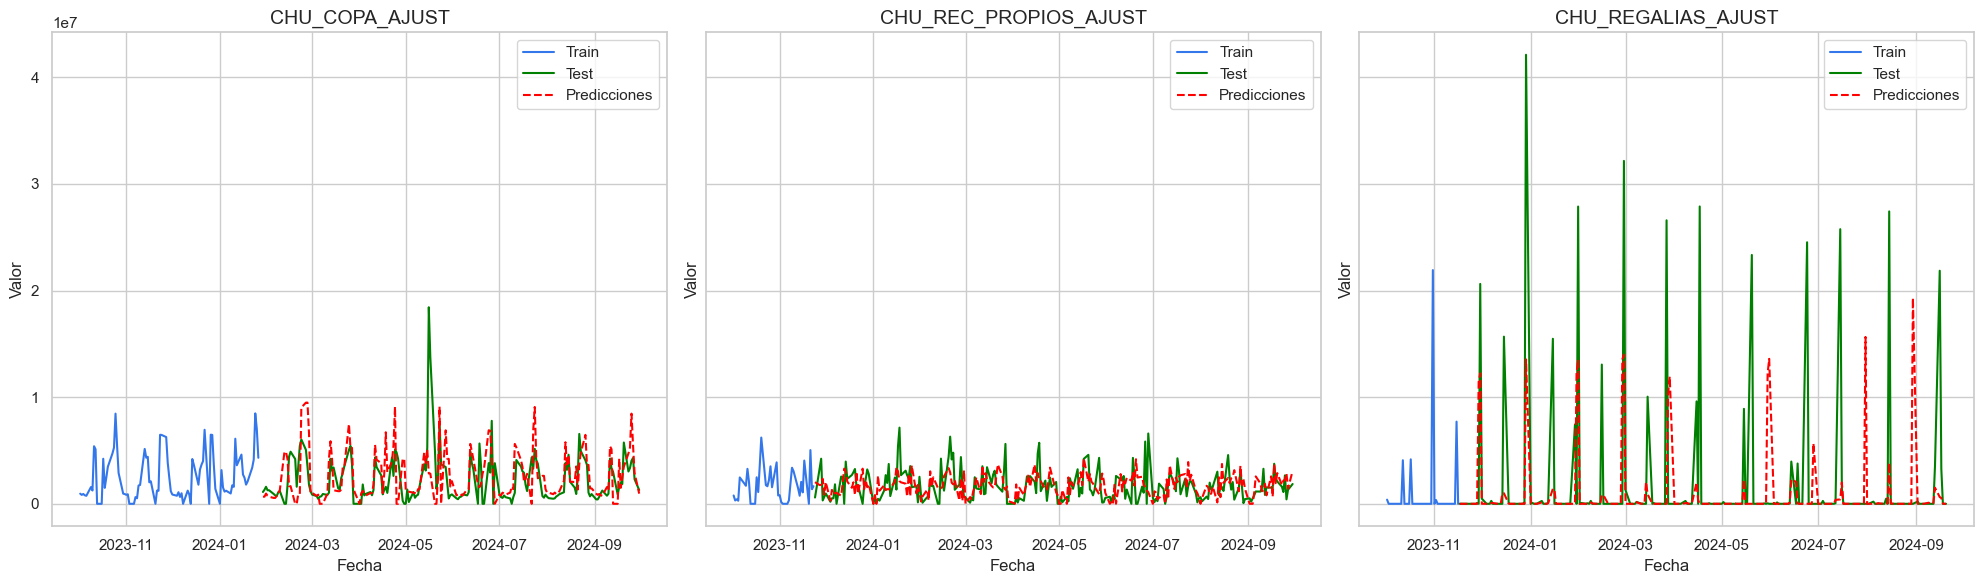

None

In [34]:
pd.options.display.float_format = '{:,.2f}'.format
display(pd.DataFrame(results_train_test))

display(funciones.plot_train_test_predictions(
    dataframes_train=dataframes_train,
    dataframes_test=dataframes_test,
    predictions_test=predictions_test,
    series_names=titulos,
    start_date='2023-10-01'
))